#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 04
**CH04A Management quality and firm size: describing patterns of association**

using the wms-management-survey dataset

version 1.0 2021-05-05

In [1]:
import os
import sys

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
import matplotlib.pyplot as plt
import numpy as np

# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/wms-management-survey/clean/"
data_out = dirname + "da_case_studies/ch04-management-firm-size/"
output = dirname + "da_case_studies/ch04-management-firm-size/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)




In [13]:
df = pd.read_csv("/workspaces/codespaces-jupyter/data/wms_da_textbook.csv")

In [14]:
df

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
0,1,2004,us,United States,38.0,3.500000,3.0,3.6,3.60,3.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2006,us,United States,38.0,3.166667,5.0,3.8,2.60,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2010,us,United States,38.0,3.000000,2.0,2.8,3.60,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2004,us,United States,28.0,4.666667,4.5,4.8,4.40,4.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2004,us,United States,28.0,4.444445,4.5,4.6,4.40,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14272,10278,2006,us,United States,35.0,2.111111,1.0,1.6,2.40,2.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14273,10279,2008,us,United States,28.0,3.666667,3.5,4.0,4.20,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14274,10280,2014,us,United States,20.0,3.611111,3.0,4.4,3.40,3.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14275,10281,2005,us,United States,34.0,3.277778,4.0,4.2,3.40,2.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Sample selection
df = df.loc[
    (df["country"] == "United States")
]

In [16]:
df

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
0,1,2004,us,United States,38.0,3.500000,3.0,3.6,3.60,3.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2006,us,United States,38.0,3.166667,5.0,3.8,2.60,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2010,us,United States,38.0,3.000000,2.0,2.8,3.60,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2004,us,United States,28.0,4.666667,4.5,4.8,4.40,4.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2004,us,United States,28.0,4.444445,4.5,4.6,4.40,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14272,10278,2006,us,United States,35.0,2.111111,1.0,1.6,2.40,2.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14273,10279,2008,us,United States,28.0,3.666667,3.5,4.0,4.20,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14274,10280,2014,us,United States,20.0,3.611111,3.0,4.4,3.40,3.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14275,10281,2005,us,United States,34.0,3.277778,4.0,4.2,3.40,2.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df.emp_firm.describe()

count     1545.000000
mean      1239.788350
std       2577.682757
min         14.000000
25%        175.000000
50%        380.000000
75%       1200.000000
max      54800.000000
Name: emp_firm, dtype: float64

In [18]:
import os

os.makedirs("data", exist_ok=True)
df.to_csv("data/wms-work_states.csv", index=False)


In [19]:
df.filter(["management", "emp_firm"]).describe()

,management,emp_firm
count,1545.000000,1545.000000
mean,3.315401,1239.788350
std,0.652853,2577.682757
min,1.222222,14.000000
25%,2.888889,175.000000
50%,3.333333,380.000000
75%,3.722222,1200.000000
max,4.944445,54800.000000


### Figure 4.1 Distribution of the management score variable

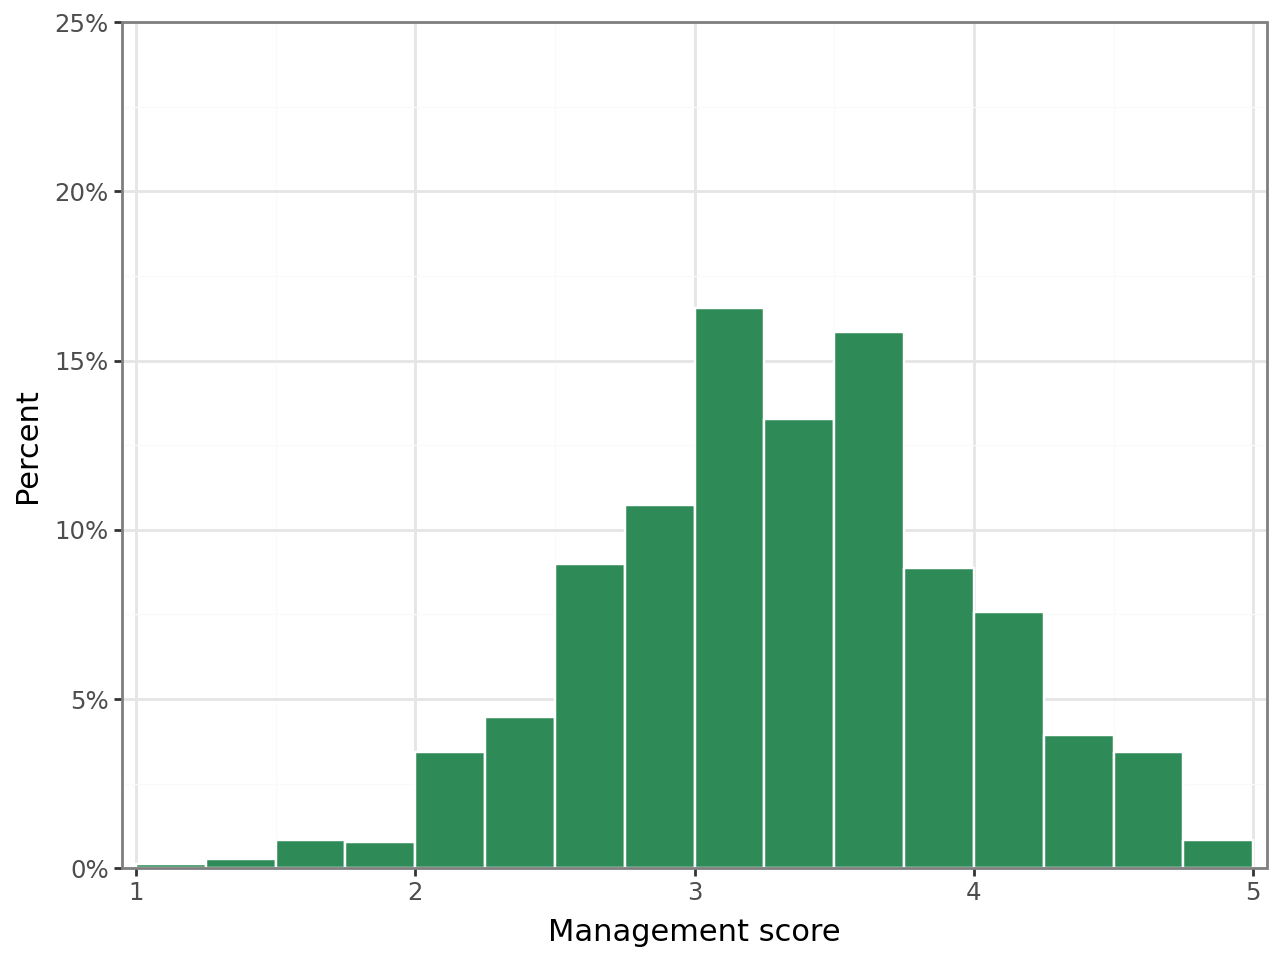

In [25]:
(
    ggplot(df, aes(x="management"))
    + geom_histogram(
        aes(y="stat(count)/sum(stat(count))"),
        fill='seagreen',
        color="white",
        binwidth=0.25,
        boundary=0,
        closed="left",
    )
    + labs(x="Management score", y="Percent")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(1, 5))
    + scale_y_continuous(
        expand=(0.00, 0.00),
        limits=(0, 0.25),
        breaks=np.arange(0, 0.26,0.05),
        labels=percent_format(),
    )
    + theme_bw()
)


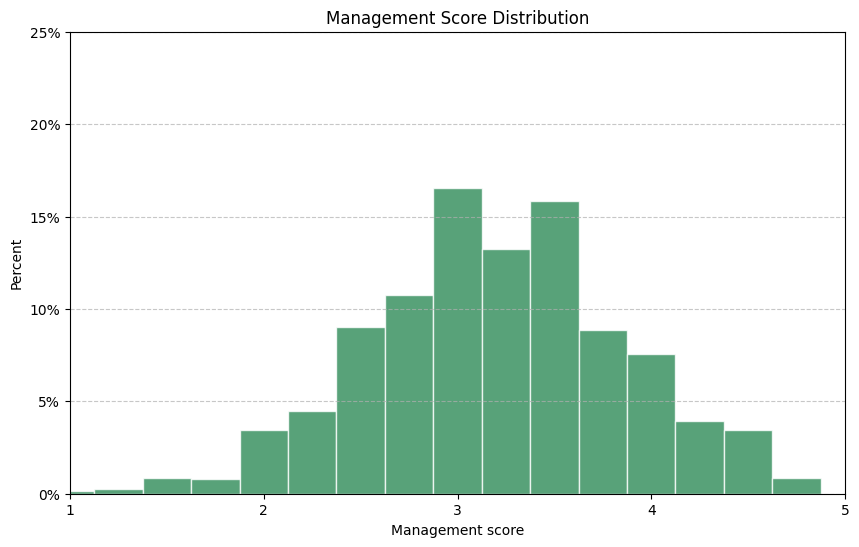

In [26]:
data = df['management']

# Calculate normalized frequencies (percentages)
bin_edges = np.arange(1, 5.25, 0.25)  # Define bin edges with binwidth=0.25
hist, bins = np.histogram(data, bins=bin_edges)
percentages = hist / hist.sum() * 100  # Convert counts to percentages

# Plot histogram
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(bin_edges[:-1], percentages, width=0.25, color="seagreen", edgecolor="white", alpha=0.8)

# Formatting
ax.set_xlabel("Management score")
ax.set_ylabel("Percent")
ax.set_title("Management Score Distribution")
ax.set_xticks(np.arange(1, 6, 1))  # Set x-axis ticks
ax.set_xlim(1, 5)  # Set x-axis limits
ax.set_ylim(0, 25)  # Set y-axis limits (scaled to percentages)
ax.set_yticks(np.arange(0, 26, 5))  # Set y-axis ticks
ax.set_yticklabels([f"{int(y)}%" for y in ax.get_yticks()])  # Add % to y-axis labels
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [28]:
df['emp_firm'].describe()

count     1545.000000
mean      1239.788350
std       2577.682757
min         14.000000
25%        175.000000
50%        380.000000
75%       1200.000000
max      54800.000000
Name: emp_firm, dtype: float64

In [29]:
df['emp_firm'].median()

np.float64(380.0)

### Figure 4.2 The distribution of employment

(a) Number of employees

/home/codespace/.python/current/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 61 rows containing non-finite values.


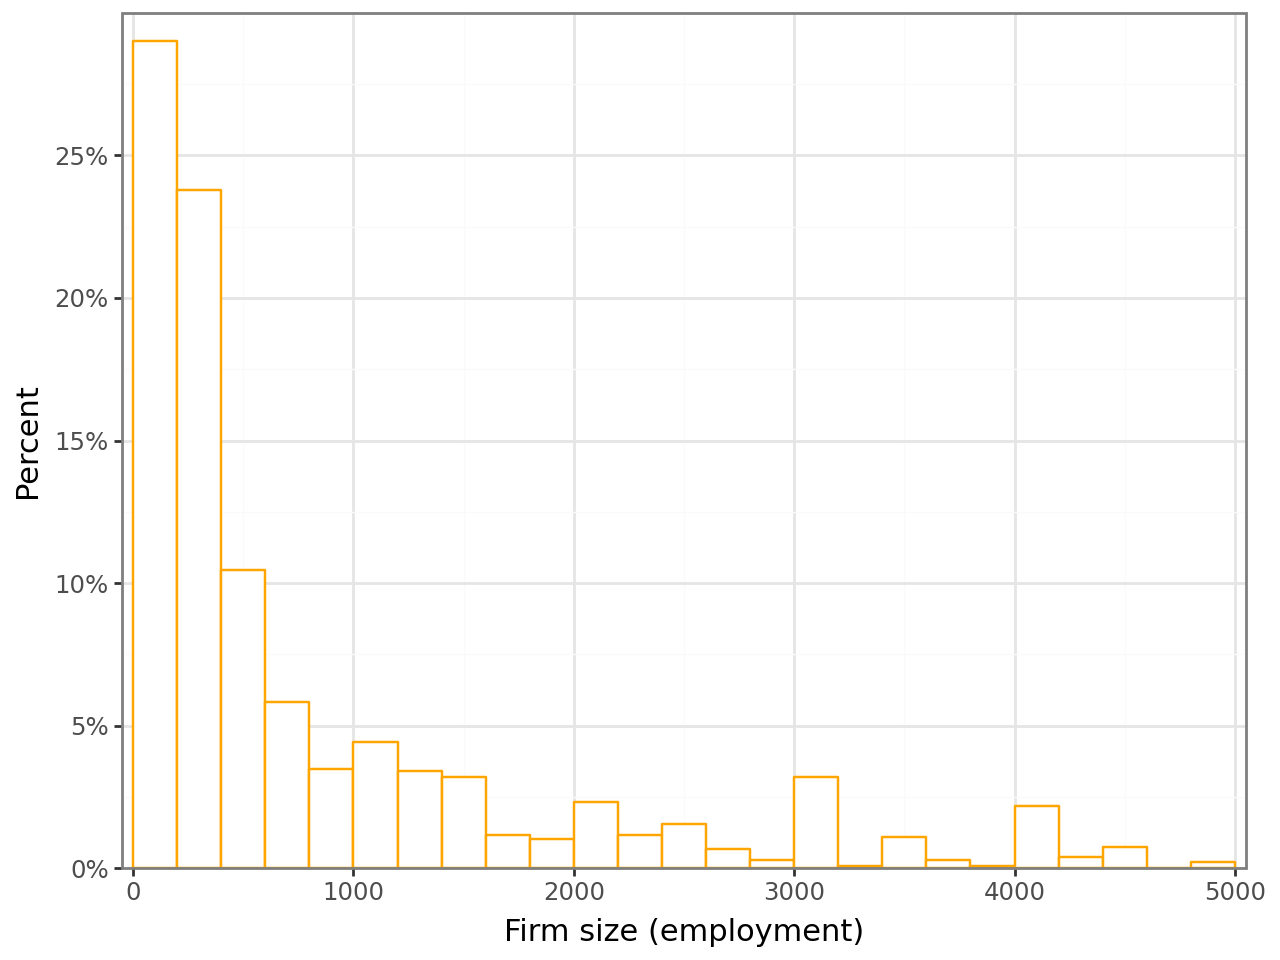

In [31]:
(
    ggplot(df, aes(x="emp_firm", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        fill="white", color="orange", binwidth=200, boundary=0, closed="left"
    )
    + labs(x="Firm size (employment)", y="Percent")
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 5000), breaks=np.arange(0, 5009, 1000)
    )
    + scale_y_continuous(
        expand=(0.00, 0.00),
        limits=(0, 0.3),
        breaks=np.arange(0, 0.5,0.05),
        labels=percent_format(),
    )
    + theme_bw()
)


In [32]:
df["lnemp"] = np.log(df.emp_firm)
df["lnemp"].describe()


/tmp/ipykernel_49776/4275541874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


count    1545.000000
mean        6.184767
std         1.301792
min         2.639057
25%         5.164786
50%         5.940171
75%         7.090077
max        10.911445
Name: lnemp, dtype: float64

(b) Natural log of number of employees

In [33]:
df["lnemp"] = np.log(df["emp_firm"])

/tmp/ipykernel_49776/3070365865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/home/codespace/.python/current/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 56 rows containing non-finite values.


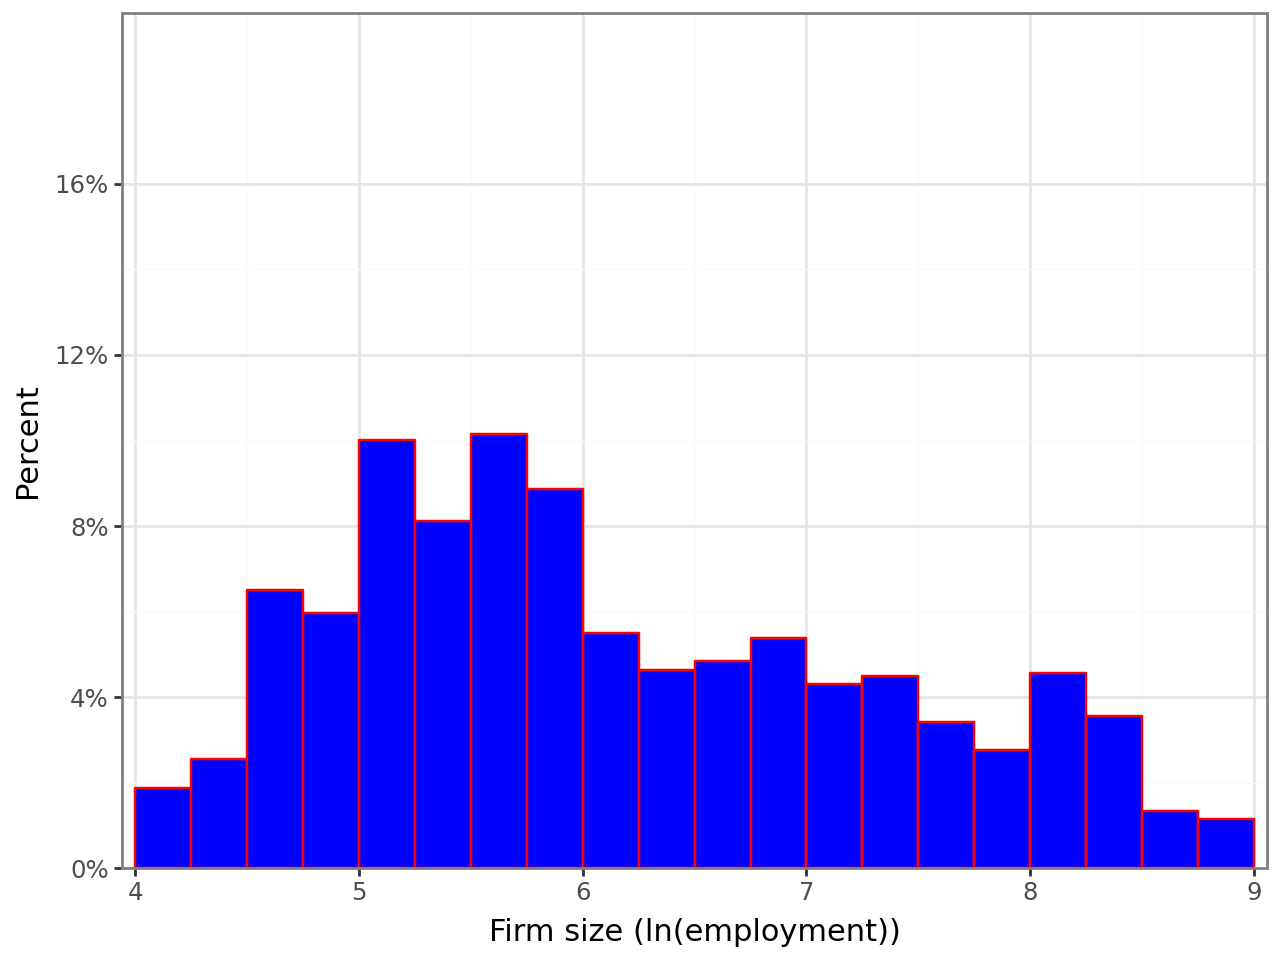

In [34]:
(
    ggplot(df, aes(x="lnemp"))
    + geom_histogram(
        aes(y="stat(count)/sum(stat(count))"),
        color="red",
        fill="blue",
        binwidth=0.25,
        boundary=0,
        closed="left",
    )
    + labs(x="Firm size (ln(employment))", y="Percent")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 9))
    + scale_y_continuous(
        expand=(0.00, 0.00),
        limits=(0, 0.2),
        breaks=np.arange(0, 0.2, 0.04),
        labels=percent_format(),
    )
    + theme_bw()
)


In [35]:
df["emp3bins"] = df["emp_firm"]

/tmp/ipykernel_49776/3971950517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
df[['emp_firm', 'emp3bins']]

,emp_firm,emp3bins
0,400.0,400.0
1,600.0,600.0
2,2000.0,2000.0
3,189.0,189.0
4,189.0,189.0
...,...,...
14272,100.0,100.0
14273,300.0,300.0
14274,190.0,190.0
14275,250.0,250.0


In [37]:
df["emp3bins"] = np.where(df["emp_firm"] < 200, 1, np.nan)
df["emp3bins"] = np.where(
    (df["emp_firm"] >= 200) & (df["emp_firm"] < 1000), 2, df["emp3bins"]
)
df["emp3bins"] = np.where(df["emp_firm"] >= 1000, 3, df["emp3bins"])

/tmp/ipykernel_49776/3588027072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_49776/3588027072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_49776/3588027072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [38]:
df[['emp_firm', 'emp3bins']]

,emp_firm,emp3bins
0,400.0,2.0
1,600.0,2.0
2,2000.0,3.0
3,189.0,1.0
4,189.0,1.0
...,...,...
14272,100.0,1.0
14273,300.0,2.0
14274,190.0,1.0
14275,250.0,2.0


In [39]:
df.groupby('emp3bins').size()


emp3bins
1.0    427
2.0    641
3.0    477
dtype: int64

In [40]:
df["emp3bins"] = df["emp3bins"].replace({1: "Small", 2: "Medium", 3: "Large"})

/tmp/ipykernel_49776/230333879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [41]:
df["emp3bins"].describe()


count       1545
unique         3
top       Medium
freq         641
Name: emp3bins, dtype: object

In [42]:
df.lean1

0        3.0
1        5.0
2        2.0
3        4.0
4        5.0
        ... 
14272    1.0
14273    4.0
14274    3.0
14275    4.0
14276    1.0
Name: lean1, Length: 1545, dtype: float64

In [45]:
df.country.unique()

array(['United States'], dtype=object)

### Figure 4.3 Quality of specific management practices by three bins of firm size: conditional probabilities

(a) Lean management

In [46]:
df1 = (
    df.filter(["emp3bins", "lean1"])
    .groupby(["emp3bins", "lean1"])
    .agg(Count=("emp3bins", "size"))
    .reset_index()
)
df1["Group_count"] = df1.groupby("emp3bins")["Count"].transform("sum")
df1["Percent"] = df1["Count"] / df1["Group_count"]
df1["lean1"] = pd.Categorical(
    df1["lean1"], categories=sorted(set(df1["lean1"]), reverse=True)
)
df1["emp3bins"] = pd.Categorical(
    df1["emp3bins"], categories=sorted(set(df1["emp3bins"]), reverse=True)
)

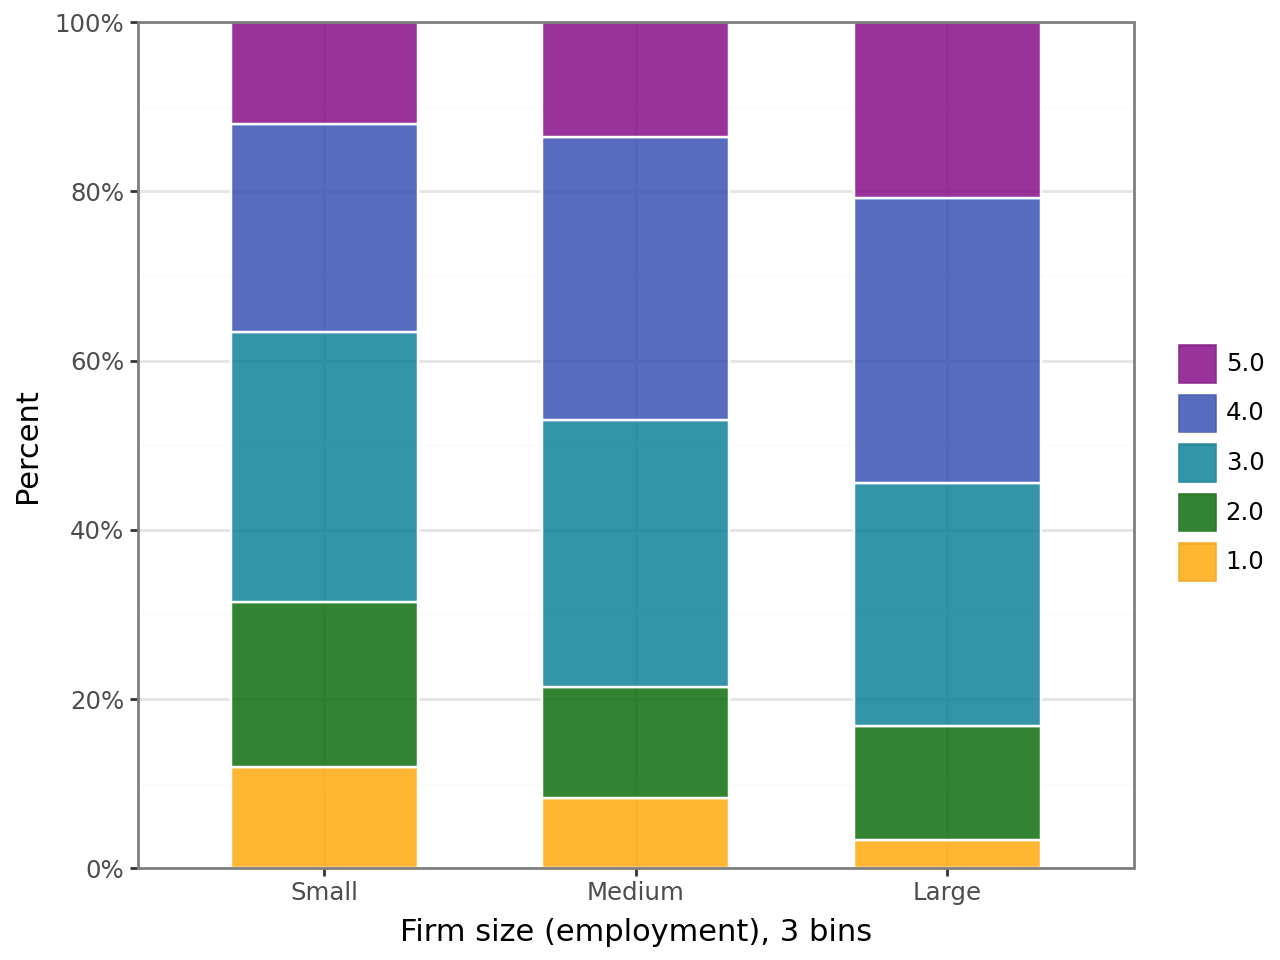

In [47]:
(
    ggplot(df1, aes(x="emp3bins", y="Percent", fill="lean1"))
    + geom_bar(
        stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
    )
    + scale_y_continuous(
        expand=(0, 0),
        limits=(0, 1),
        breaks=np.arange(0, 1.1,0.2),
        labels=percent_format(),
    )
    + labs(x="Firm size (employment), 3 bins", y="Percent")
    + theme_bw()
    + theme(legend_position="right")
    + scale_fill_manual(
        values=("purple", "#2e47af", "#017B92", "darkgreen", "orange"), name=" "
    )
)


In [48]:
print(df.columns)

Index(['firmid', 'wave', 'cty', 'country', 'sic', 'management', 'operations',
       'monitor', 'target', 'people',
       ...
       'aa_198', 'aa_199', 'aa_200', 'aa_201', 'aa_202', 'aa_203', 'aa_204',
       'aa_205', 'lnemp', 'emp3bins'],
      dtype='object', length=247)


(b) Performance tracking

In [49]:
df1 = (
    df.filter(["emp3bins", "perf2"])
    .groupby(["emp3bins", "perf2"])
    .agg(Count=("emp3bins", "size"))
    .reset_index()
)
df1["Group_count"] = df1.groupby("emp3bins")["Count"].transform("sum")
df1["Percent"] = df1["Count"] / df1["Group_count"]
df1["perf2"] = pd.Categorical(
    df1["perf2"], categories=sorted(set(df1["perf2"]), reverse=True)
)
df1["emp3bins"] = pd.Categorical(
    df1["emp3bins"], categories=sorted(set(df1["emp3bins"]), reverse=True)
)

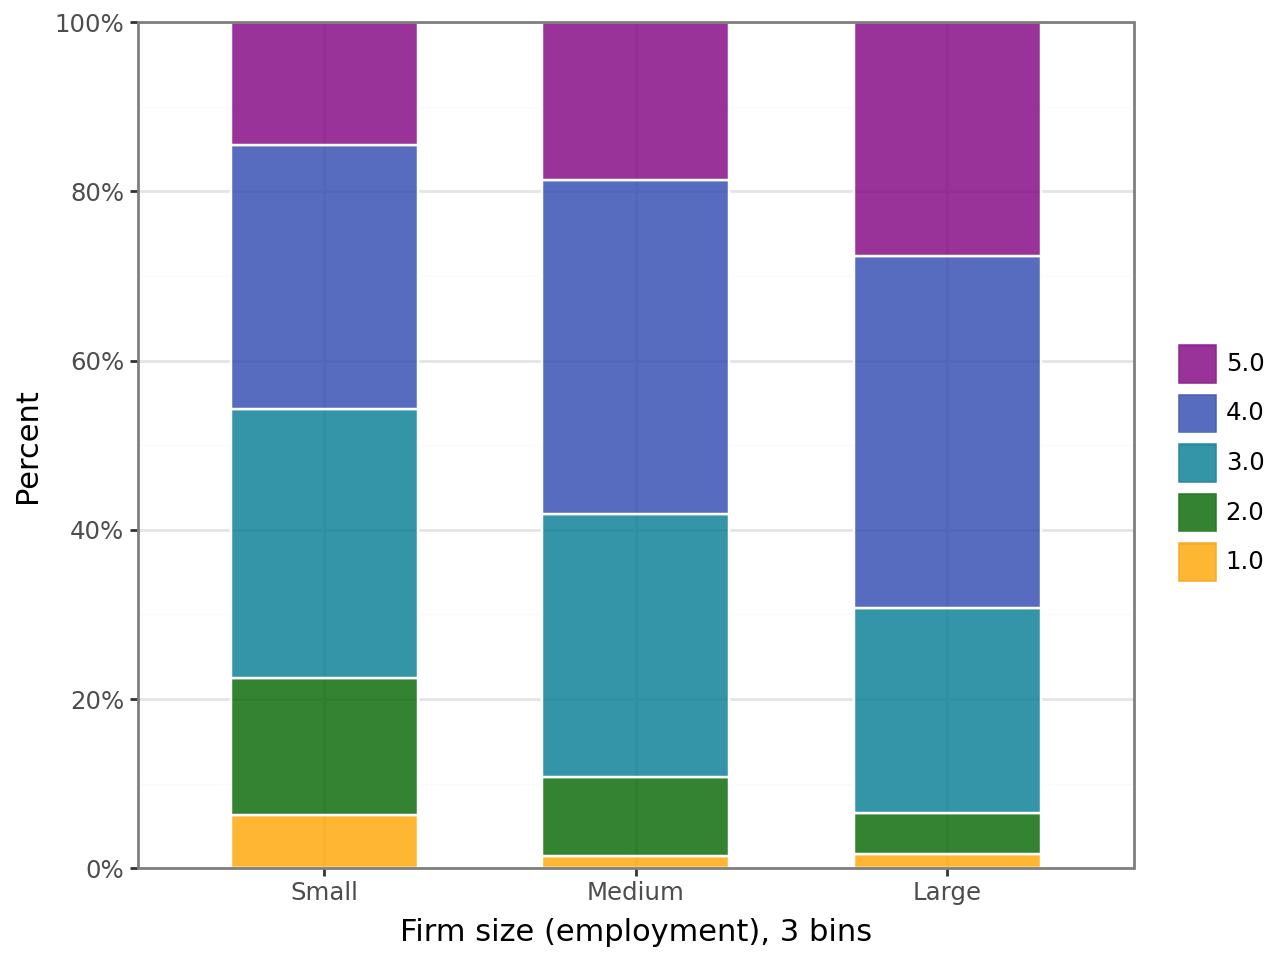

In [50]:
(
    ggplot(df1, aes(x="emp3bins", y="Percent", fill="perf2"))
    + geom_bar(
        stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
    )
    + scale_y_continuous(
        expand=(0, 0),
        limits=(0, 1),
        breaks=np.arange(0, 1.1,0.2),
        labels=percent_format(),
    )
    + labs(x="Firm size (employment), 3 bins", y="Percent")
    + theme_bw()
    + theme(legend_position="right")
    + scale_fill_manual(
        values=("purple", "#2e47af", "#017B92", "darkgreen", "orange"), name=" "
    )
)

In [51]:
# Bin scatters avg score by employment bins

# Option 1: create 3 bins as defined by thresholds

# Summary

df.groupby("emp3bins")["emp_firm"].agg(["min", "max", "mean", "median", np.std, "size"])

/tmp/ipykernel_49776/793889614.py:7: FutureWarning: The provided callable <function std at 0x73d41cc44900> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.


,min,max,mean,median,std,size
emp3bins,,,,,,
Large,1000.0,54800.0,3345.685535,2300.0,3876.118495,477
Medium,200.0,980.0,416.410296,350.0,196.077468,641
Small,14.0,197.0,123.330211,125.0,38.884397,427


In [52]:
# Recode employee bins
df["emp3bins"] = df["emp3bins"].replace(1, 150).replace(2, 600).replace(3, 3000)


/tmp/ipykernel_49776/3713431738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [53]:
# Summary
df.groupby("emp3bins")["emp_firm"].agg(["min", "max", "mean", "median", np.std, "size"])

/tmp/ipykernel_49776/663057755.py:2: FutureWarning: The provided callable <function std at 0x73d41cc44900> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.


,min,max,mean,median,std,size
emp3bins,,,,,,
Large,1000.0,54800.0,3345.685535,2300.0,3876.118495,477
Medium,200.0,980.0,416.410296,350.0,196.077468,641
Small,14.0,197.0,123.330211,125.0,38.884397,427


In [56]:
# Generate variables by mean
df1 = (
    df.groupby("emp3bins").agg(management_emp3bins=("management", "mean")).reset_index()
)
df1


,emp3bins,management_emp3bins
0,Large,3.498532
1,Medium,3.325672
2,Small,3.095407


### Figure 4.4 Mean management quality score and firm size

(a) Three bins of employment

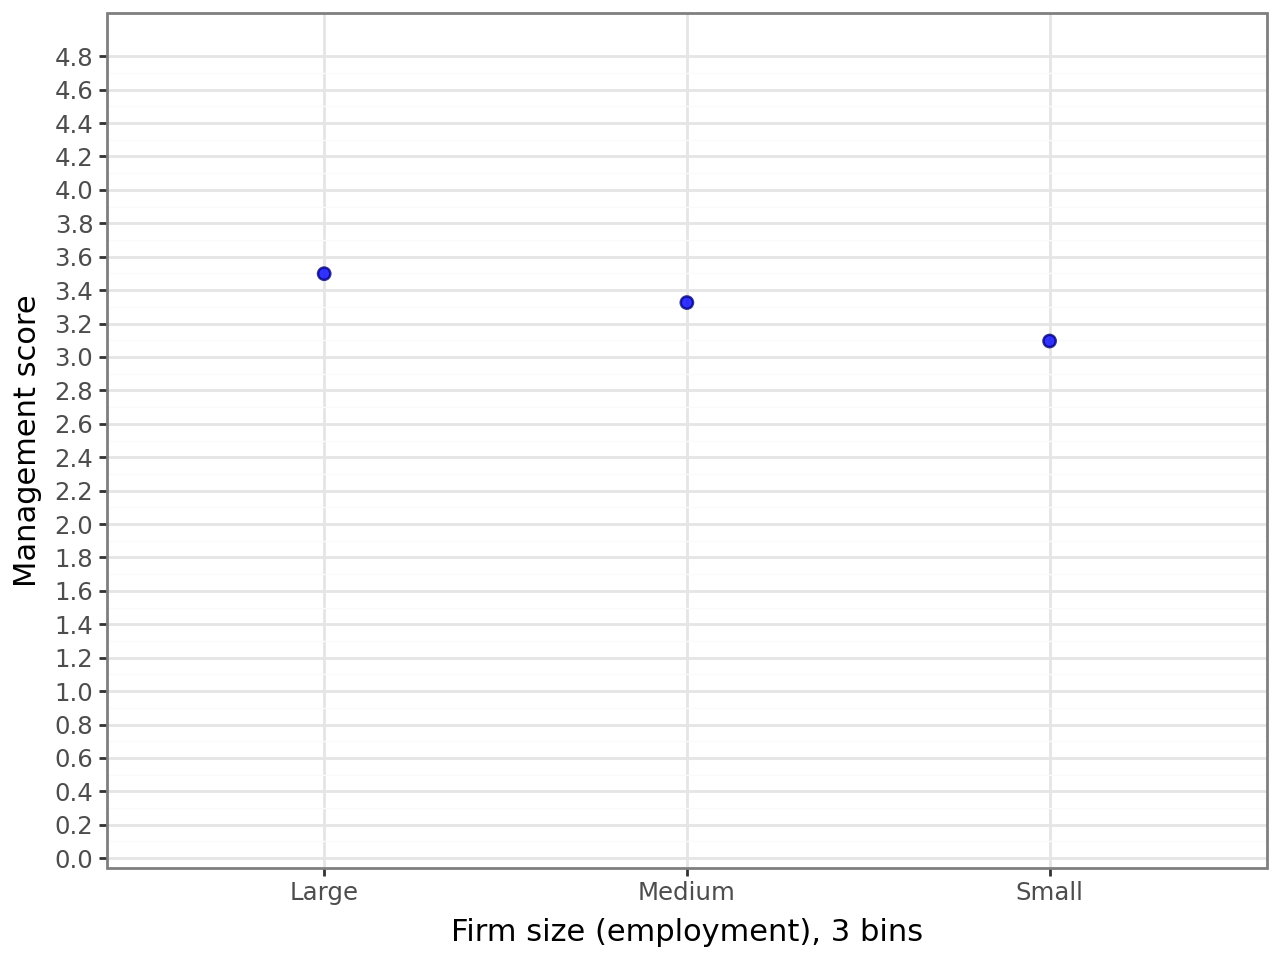

In [59]:
(
    ggplot(df1, aes(x="emp3bins", y="management_emp3bins"))
    + geom_point(size=2, color="navy", fill="blue", alpha=0.8, na_rm=True)
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 5), breaks=np.arange(0, 5, 0.2)
    )
    + scale_x_discrete()
    + labs(x="Firm size (employment), 3 bins", y="Management score")
    + theme_bw()
)


In [60]:
df["emp10bins"] = pd.qcut(df["emp_firm"], 10)


/tmp/ipykernel_49776/2781414756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [61]:
# Summary
df_summary = (
    df.filter(["emp_firm", "emp10bins"])
    .groupby("emp10bins")
    .agg(["min", "max", "mean", "median", np.std, "size"])
)
df_summary


/tmp/ipykernel_49776/4189502466.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/tmp/ipykernel_49776/4189502466.py:5: FutureWarning: The provided callable <function std at 0x73d41cc44900> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.


emp_firm                                                
                       min      max         mean  median          std size
emp10bins                                                                 
(13.999, 108.0]       14.0    108.0    81.737179    88.5    22.236591  156
(108.0, 150.0]       109.0    150.0   134.238889   135.0    14.715311  180
(150.0, 200.0]       152.0    200.0   183.432432   185.0    16.047193  148
(200.0, 260.0]       203.0    260.0   240.185714   250.0    15.449424  140
(260.0, 380.0]       265.0    380.0   324.362416   320.0    30.152140  149
(380.0, 569.4]       385.0    569.0   460.577922   450.0    53.419145  154
(569.4, 1000.0]      570.0   1000.0   806.232323   800.0   155.211062  198
(1000.0, 1650.4]    1050.0   1650.0  1352.297297  1373.0   152.109924  111
(1650.4, 3000.0]    1652.0   3000.0  2415.074534  2400.0   462.917373  161
(3000.0, 54800.0]   3208.0  54800.0  6756.486486  4936.5  5532.117780  148

In [62]:
# Recode with bin means
df = df.replace({"emp10bins": df_summary["emp_firm"]["mean"].to_dict()})


/tmp/ipykernel_49776/1509587662.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/tmp/ipykernel_49776/1509587662.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.


In [63]:
df.groupby("emp10bins")["emp_firm"].agg(
    ["min", "max", "mean", "median", np.std, "size"]
)

/tmp/ipykernel_49776/2461827766.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/tmp/ipykernel_49776/2461827766.py:1: FutureWarning: The provided callable <function std at 0x73d41cc44900> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.


,min,max,mean,median,std,size
emp10bins,,,,,,
81.737179,14.0,108.0,81.737179,88.5,22.236591,156
134.238889,109.0,150.0,134.238889,135.0,14.715311,180
183.432432,152.0,200.0,183.432432,185.0,16.047193,148
240.185714,203.0,260.0,240.185714,250.0,15.449424,140
324.362416,265.0,380.0,324.362416,320.0,30.152140,149
460.577922,385.0,569.0,460.577922,450.0,53.419145,154
806.232323,570.0,1000.0,806.232323,800.0,155.211062,198
1352.297297,1050.0,1650.0,1352.297297,1373.0,152.109924,111
2415.074534,1652.0,3000.0,2415.074534,2400.0,462.917373,161


In [64]:
# Generate variables by mean
df1 = (
    df.groupby("emp10bins")
    .agg(management_emp10bins=("management", "mean"))
    .reset_index()
    .assign(emp10bins = lambda x: x["emp10bins"].astype(int))
)
df1


/tmp/ipykernel_49776/3276830711.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,emp10bins,management_emp10bins
0,81,2.942143
1,134,3.192702
2,183,3.201245
3,240,3.281569
4,324,3.351947
5,460,3.348326
6,806,3.390655
7,1352,3.449449
8,2415,3.504608
9,6756,3.526130


(b) Ten bins of employment

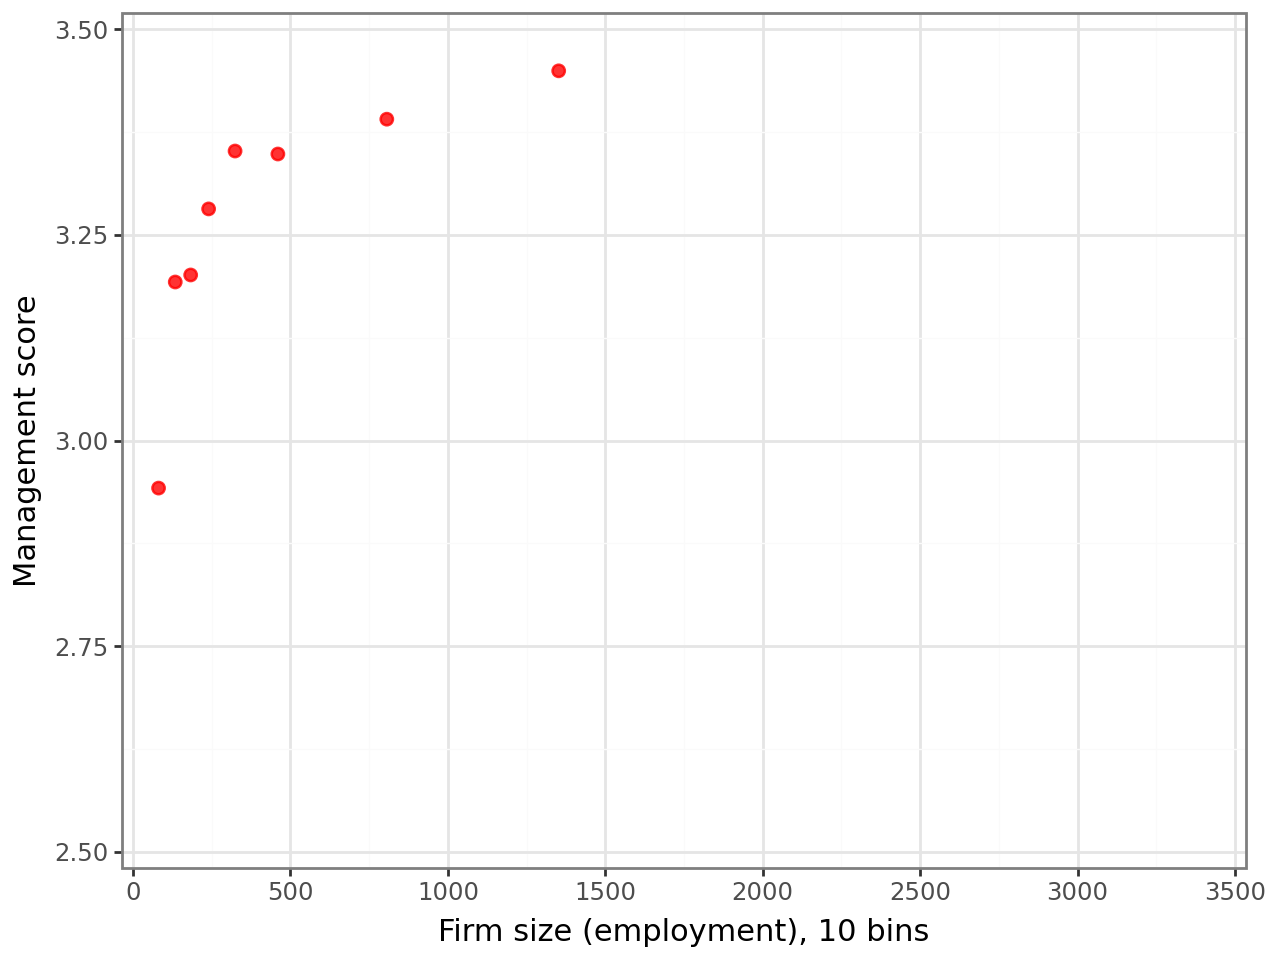

In [65]:
(
    ggplot(df1, aes(x="emp10bins", y="management_emp10bins"))
    + geom_point(size=2, color="red", fill="red", alpha=0.8, na_rm=True)
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.5, 3.5), breaks=np.arange(2.5, 3.6,0.25)
    )
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 3500), breaks=np.arange(0, 3501, 500)
    )
    + labs(x="Firm size (employment), 10 bins", y="Management score")
    + theme_bw()
)


In [66]:
cov = df["management"].cov(df["emp_firm"])
cov

np.float64(181.62629661429287)

In [67]:
cov = df["management"].corr(df["emp_firm"])
cov

np.float64(0.10792798853267475)

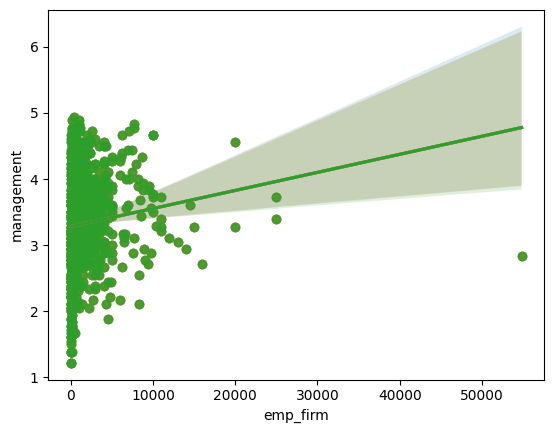

In [70]:
import seaborn as sns
sns.regplot(x='emp_firm', y='management', data=df)
plt.show()


### Figure 4.5 The joint distribution of the management quality score and firm size

(a) By employment

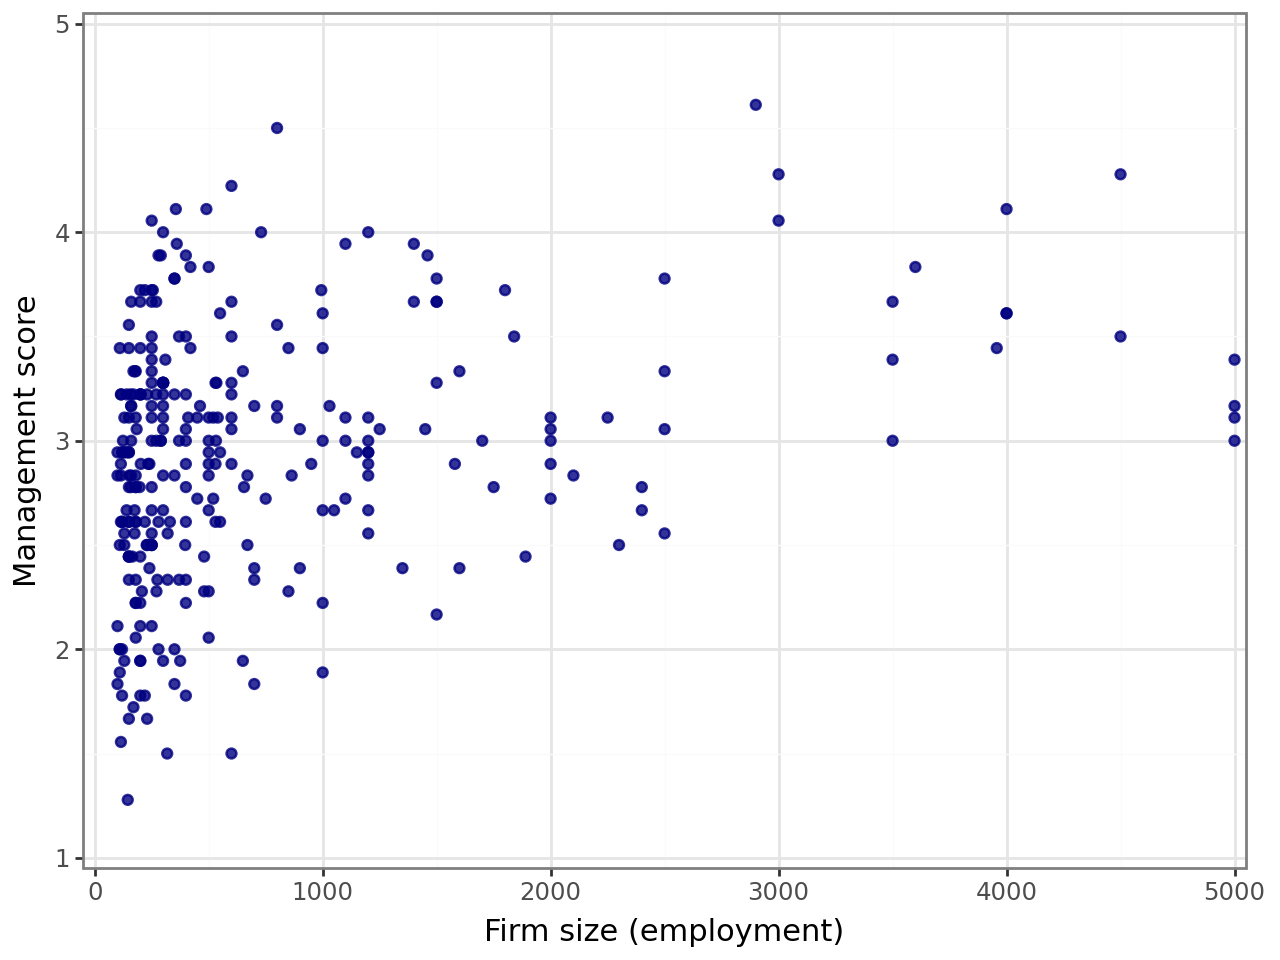

In [ ]:
(
    ggplot(df, aes(x="emp_firm", y="management"))
    + geom_point(color="navy", size=1.5, alpha=0.8, show_legend=False, na_rm=True)
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 5000), breaks=np.arange(0, 5001, 1000)
    )
    + scale_y_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=np.arange(1, 6, 1))
    + labs(x="Firm size (employment)", y="Management score")
    + theme_bw()
)


(b) By log employment

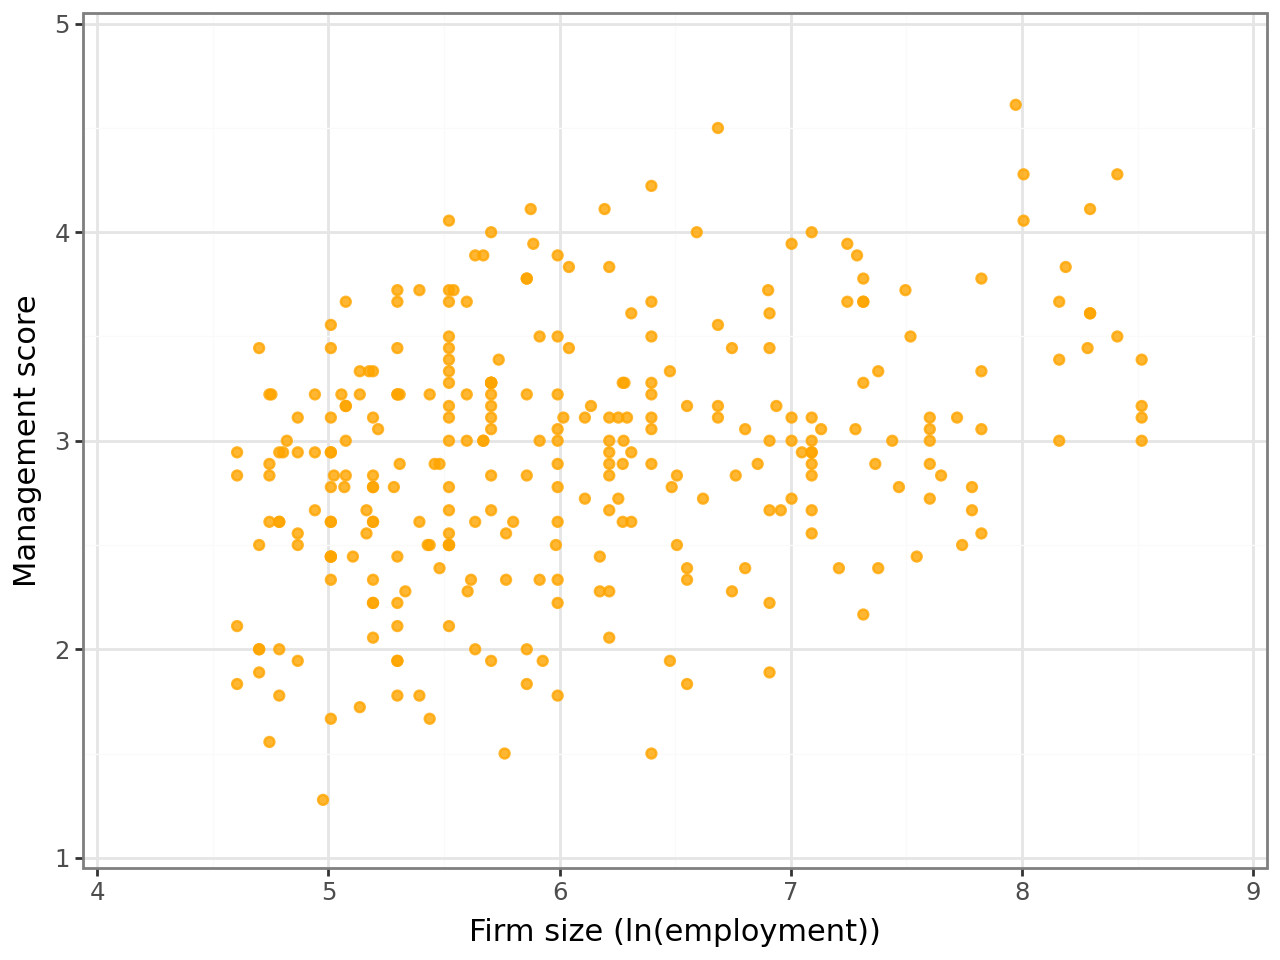

In [ ]:
df["lnemp"] = np.log(df["emp_firm"])

(
    ggplot(df, aes(x="lnemp", y="management"))
    + geom_point(color="orange", size=1.5, alpha=0.8, show_legend=False, na_rm=True)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 9), breaks=np.arange(4, 10, 1))
    + scale_y_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=np.arange(1, 6, 1))
    + labs(x="Firm size (ln(employment))", y="Management score")
    + theme_bw()
)


### Figure 4.6 Conditional summary statistics of the management score by bins of firm size

In [31]:
df = df.replace({"emp3bins": {150: "Small", 600: "Medium", 3000: "Large"}})
df['emp3bins'] = pd.Categorical(df['emp3bins'], categories=sorted(set(df['emp3bins']), reverse=True))

KeyError: 'emp3bins'

Box plots

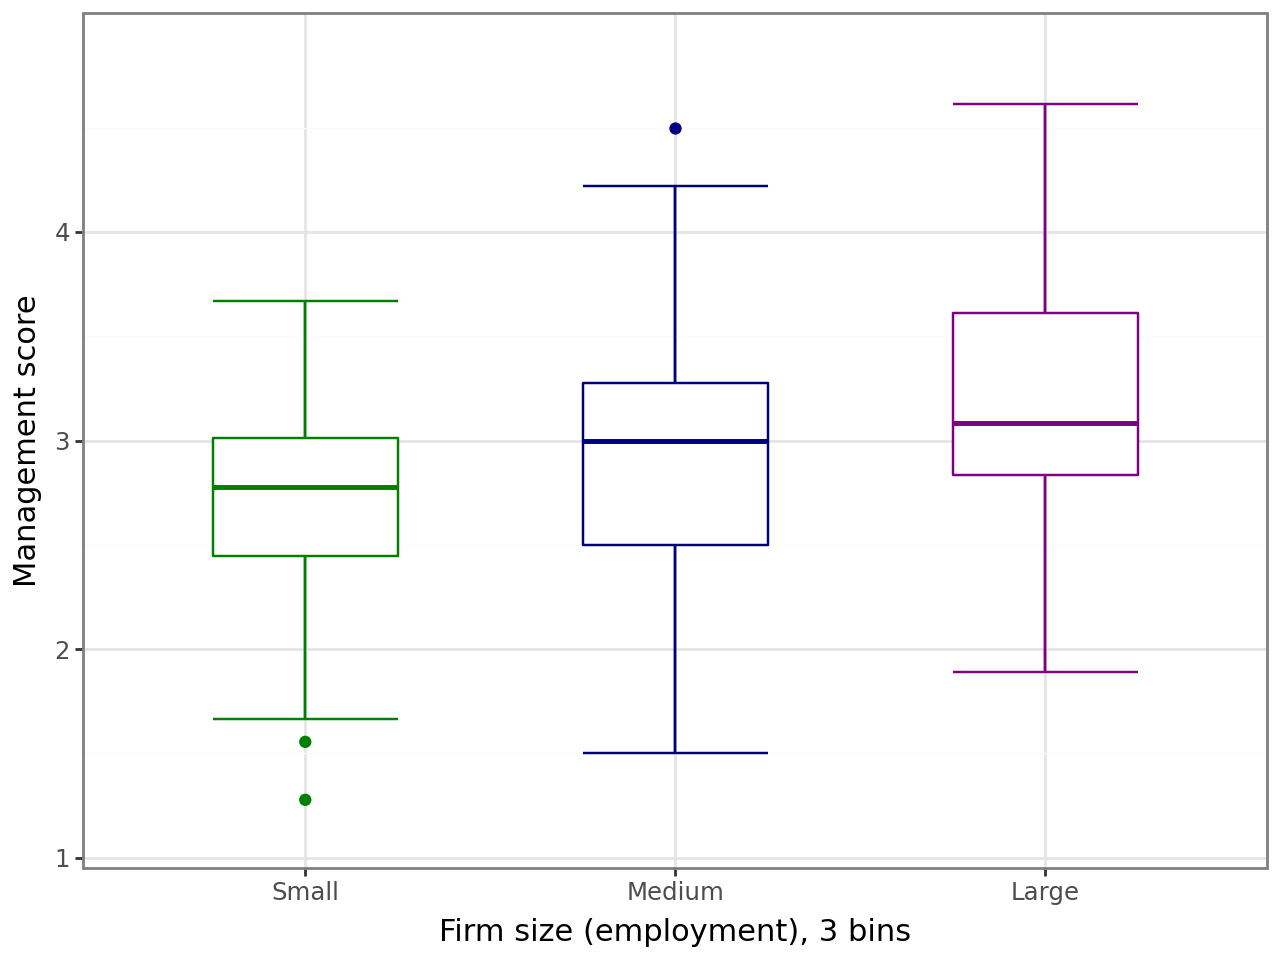

In [ ]:
(
    ggplot(df, aes(x="emp3bins", y="management", group="emp3bins"))
    + stat_boxplot(
        geom="errorbar",
        width=0.5,
        color=("green", "navy", "purple"),
        size=0.5,
        na_rm=True,
    )
    + geom_boxplot(
        color=("green", "navy", "purple"), size=0.5, width=0.5, na_rm=True
    )
    + labs(x="Firm size (employment), 3 bins", y="Management score")
    + scale_y_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=np.arange(1, 5, 1))
    + theme_bw()
)

/tmp/ipykernel_66895/3123584315.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



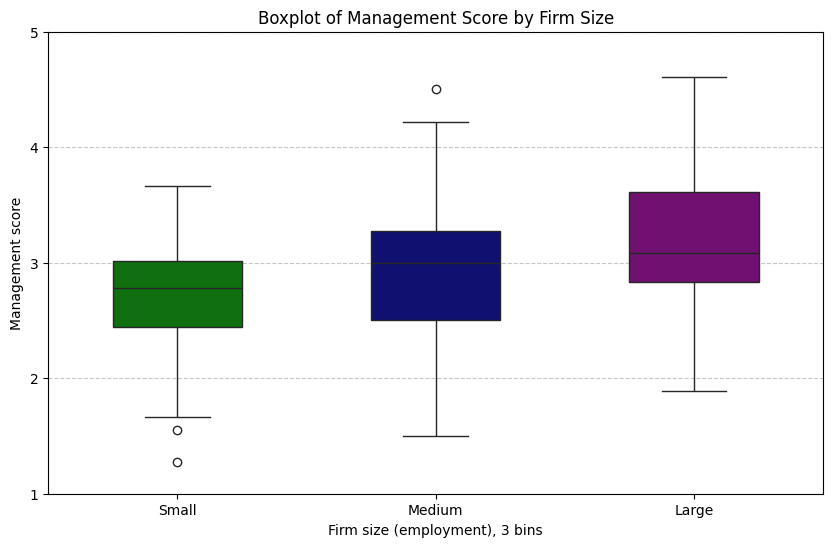

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="emp3bins", 
    y="management", 
    data=df, 
    palette=["green", "navy", "purple"], 
    width=0.5
)

# Formatting
plt.xlabel("Firm size (employment), 3 bins")
plt.ylabel("Management score")
plt.title("Boxplot of Management Score by Firm Size")
plt.ylim(1, 5)  # Set y-axis limits
plt.yticks(np.arange(1, 6, 1))  # Set y-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
sns.set_style("whitegrid")

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(
    data=df, x="emp3bins", y="management", width=0.5, ax=ax, flierprops={"marker": "o"}
)

box_line_col = ["green", "navy", "purple"]
for i, box_col in enumerate(box_line_col):
    mybox = ax.patches[i]
    mybox.set_facecolor(mpl.colors.to_rgba(box_col, 0.5))
    mybox.set_edgecolor(box_col)
    for j in range(i * 6, i * 6 + 6):
        line = ax.lines[j]
        line.set_color(box_col)
        line.set_mfc(mpl.colors.to_rgba(box_col, 0.5))
        line.set_mec(mpl.colors.to_rgba(box_col, 0.5))

plt.ylabel("Management score", size=12)
plt.xlabel("Firm size (employment), 3 bins", size=12)
plt.yticks(np.arange(1, 5, 1))
#add_margin(ax, x=0.1, y=0.01)
plt.show()

NameError: name 'sns' is not defined

Violin plot

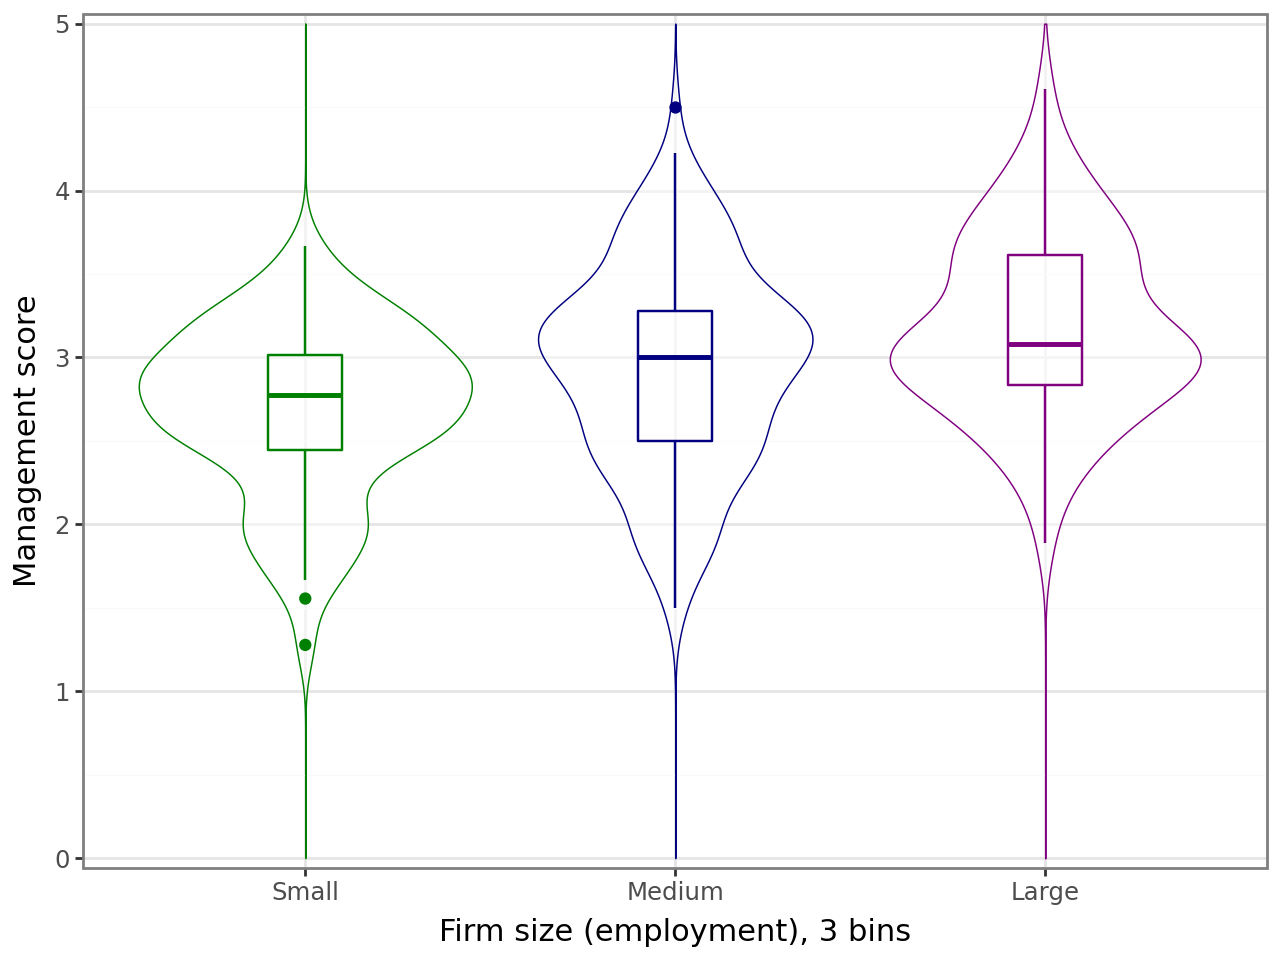

In [ ]:
(
    ggplot(
        df,
        aes(x="emp3bins", y="management", color="emp3bins", group="emp3bins"),
    )
    + geom_violin(size=0.3, alpha=0.5, trim=False, show_legend=False, na_rm=True)
    + geom_boxplot(size=0.5, width=0.2, alpha=0.3, na_rm=True)
    + labs(x="Firm size (employment), 3 bins", y="Management score")
    + scale_color_manual(values=(["green", "navy", "purple"]))
    + scale_y_continuous(expand=(0.01, 0.01), limits=(0, 5), breaks=np.arange(0, 6, 1))
    + guides(fill=False, color=False)
    + theme_bw()
)

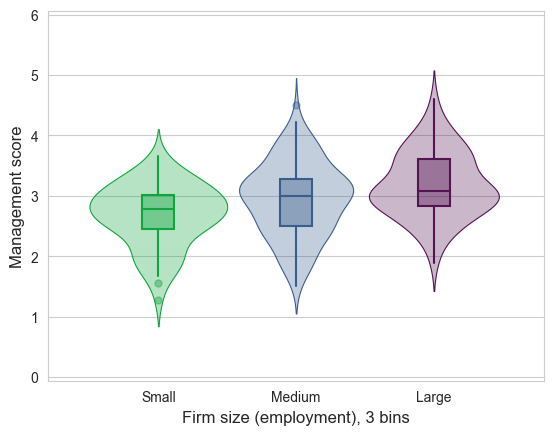

In [ ]:
fig, ax = plt.subplots()
sns.violinplot(
    data=df,
    x="emp3bins",
    y="management",
    ax=ax,
    flierprops={"marker": "o"},
    width=1,
    linewidth=0.8,
    inner=None,
)

violin_line_col = [color[1], color[0], color[2]]
for i, violin_col in enumerate(violin_line_col):
    mybox = ax.collections[i]
    mybox.set_facecolor(mpl.colors.to_rgba(violin_col, 0.3))
    mybox.set_edgecolor(violin_col)

sns.boxplot(
    data=df,
    x="emp3bins",
    y="management",
    ax=ax,
    width=0.23,
    showcaps=False,
    flierprops={"marker": "o"},
)

box_line_col = [color[1], color[0], color[2]]
for i, box_col in enumerate(box_line_col):
    mybox = ax.patches[i]
    mybox.set_facecolor(mpl.colors.to_rgba(box_col, 0.4))
    mybox.set_edgecolor(box_col)
    for j in range(i * 4, i * 4 + 4):
        line = ax.lines[j]
        line.set_color(box_col)
        line.set_mfc(mpl.colors.to_rgba(box_col, 0.4))
        line.set_mec(mpl.colors.to_rgba(box_col, 0.4))

plt.ylabel("Management score", size=12)
plt.xlabel("Firm size (employment), 3 bins", size=12)
plt.yticks(seq(0, 6, 1))
add_margin(ax, x=0.1, y=0.01)
plt.show()

In [ ]:
covariance = df["management"].cov(df["emp_firm"])
print("Covariance between management score and company size:", covariance)

Covariance between management score and company size: 177.34865628919474


In [ ]:
# Calculate covariance manually (without using corr or cov methods)
x = df["management"].values
y = df["emp_firm"].values

mean_x = x.mean()
mean_y = y.mean()

cov_manual = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)
print("Manual covariance between management score and company size:", cov_manual)

Manual covariance between management score and company size: 177.34865628919476


In [ ]:
df.management.std(), df.emp_firm.std()


(np.float64(0.6010590694155762), np.float64(977.0356848643389))

In [ ]:
corr_manual = cov_manual/(df.management.std() * df.emp_firm.std())
corr_manual

np.float64(0.3019953957247906)

In [ ]:
correlation = df["management"].corr(df["emp_firm"])
print("Correlation between management score and company size:", correlation)

Correlation between management score and company size: 0.3019953957247906


In [ ]:
df.management.describe()


count    300.000000
mean       2.938519
std        0.601059
min        1.277778
25%        2.555556
50%        2.944444
75%        3.277778
max        4.611111
Name: management, dtype: float64

In [ ]:
# Correlation
df["management"].corr(df["emp_firm"])

np.float64(0.3019953957247906)

In [ ]:
# by industry
df.loc[df["sic"] <= 21, "industry_broad"] = "food_drinks_tobacco"
df.loc[
    ((df["sic"] >= 22) & (df["sic"] <= 23)) | (df["sic"] == 31), "industry_broad"
] = "textile_apparel_leather_etc"
df.loc[(df["sic"] >= 24) & (df["sic"] <= 27), "industry_broad"] = "wood_furniture_paper"
df.loc[(df["sic"] >= 28) & (df["sic"] <= 30), "industry_broad"] = "chemicals_etc"
df.loc[(df["sic"] >= 32) & (df["sic"] < 35), "industry_broad"] = "materials_metals"
df.loc[(df["sic"] >= 35) & (df["sic"] < 37), "industry_broad"] = "electronics"
df.loc[df["sic"] == 37, "industry_broad"] = "auto"
df.loc[df["sic"] >= 38, "industry_broad"] = "other"

In [ ]:
df["industry_broad"].value_counts()


industry_broad
chemicals_etc                  69
materials_metals               50
textile_apparel_leather_etc    38
wood_furniture_paper           37
electronics                    36
food_drinks_tobacco            34
auto                           26
other                          10
Name: count, dtype: int64

In [ ]:
# Correlation
df.groupby("industry_broad")[["management", "emp_firm"]].corr().iloc[0::2, -1].round(2)


industry_broad                         
auto                         management    0.50
chemicals_etc                management    0.05
electronics                  management    0.28
food_drinks_tobacco          management    0.05
materials_metals             management    0.32
other                        management    0.63
textile_apparel_leather_etc  management    0.36
wood_furniture_paper         management    0.29
Name: emp_firm, dtype: float64

In [ ]:
(
    df.loc[df["industry_broad"].notna(), ["management", "industry_broad"]]
    .groupby("industry_broad")
    .agg(
        Min=("management", min),
        Max=("management", max),
        SD=("management", np.std),
        Median=("management", "median"),
        n=("management", "size"),
    )
    .round(3)
)

,Min,Max,SD,Median,n
industry_broad,,,,,
auto,2.278,4.278,0.553,3.194,26
chemicals_etc,1.278,4.111,0.550,3.000,69
electronics,1.500,4.500,0.693,3.111,36
food_drinks_tobacco,1.889,4.222,0.526,2.833,34
materials_metals,1.556,4.278,0.565,2.861,50
other,1.778,4.611,0.844,3.556,10
textile_apparel_leather_etc,1.778,4.000,0.567,2.778,38
wood_furniture_paper,1.722,3.556,0.556,2.833,37


In [ ]:
(
    df.loc[df["industry_broad"].notna(), ["emp_firm", "industry_broad"]]
    .groupby("industry_broad")
    .agg(
        Min=("emp_firm", min),
        Max=("emp_firm", max),
        SD=("emp_firm", np.std),
        Median=("emp_firm", "median"),
        n=("emp_firm", "size"),
    )
    .round(3)
)

,Min,Max,SD,Median,n
industry_broad,,,,,
auto,130.0,5000.0,1625.104,500.0,26
chemicals_etc,116.0,2000.0,465.981,356.0,69
electronics,115.0,5000.0,1126.787,295.0,36
food_drinks_tobacco,120.0,2400.0,665.626,471.0,34
materials_metals,100.0,5000.0,1151.437,335.0,50
other,200.0,2900.0,867.247,350.0,10
textile_apparel_leather_etc,110.0,4000.0,899.413,350.0,38
wood_furniture_paper,100.0,3500.0,855.610,300.0,37


In [ ]:
# Correlation
cor = (
    df.groupby("industry_broad")["management", "emp_firm"]
    .corr()
    .iloc[0::2, -1]
    .reset_index()
    .drop(["level_1"], axis=1)
    .set_index("industry_broad")
    .rename({"emp_firm": "correlation"}, axis=1)
)
cor.round(3)

,correlation
industry_broad,
auto,0.502
chemicals_etc,0.053
electronics,0.282
food_drinks_tobacco,0.052
materials_metals,0.321
other,0.628
textile_apparel_leather_etc,0.361
wood_furniture_paper,0.295


In [ ]:
table41 = (
    df.filter(["emp_firm", "industry_broad", "management"])
    .groupby("industry_broad")
    .agg(Mean=("management", "mean"), Obs=("management", "size"))
)
table41["Corr"] = cor["correlation"]

In [ ]:
table41.index = [
    "Auto",
    "Chemicals",
    "Machinery, equipment, electronics",
    "Food, drinks, tobacco",
    "Materials, metals",
    "Textile, apparel, leather",
    "Wood, furniture, paper",
    "Other",
]
table41.round(3)


,Mean,Obs,Corr
Auto,3.254,26,0.502
Chemicals,2.969,69,0.053
"Machinery, equipment, electronics",3.145,36,0.282
"Food, drinks, tobacco",2.871,34,0.052
"Materials, metals",2.849,50,0.321
"Textile, apparel, leather",3.289,10,0.628
"Wood, furniture, paper",2.769,38,0.361
Other,2.722,37,0.295


In [ ]:
last_row = (
    table41.groupby(lambda _: True)
    .agg(Mean=("Mean", "mean"), Obs=("Obs", "sum"), Corr=("Corr", "mean"))
    .reset_index(drop=True)
)
last_row.index = ["All"]
table41 = table41.append(last_row)

In [ ]:
table41 = table41.filter(["Corr", "Mean", "Obs"]).reset_index()
table41.columns = [
    "Industry",
    "Management - employment correlation",
    "Management score",
    "Observations",
]

In [ ]:
table41.round(2)


,Industry,Management - employment correlation,Management score,Observations
0,Auto,0.50,3.25,26
1,Chemicals,0.05,2.97,69
2,"Machinery, equipment, electronics",0.28,3.15,36
3,"Food, drinks, tobacco",0.05,2.87,34
4,"Materials, metals",0.32,2.85,50
5,"Textile, apparel, leather",0.63,3.29,10
6,"Wood, furniture, paper",0.36,2.77,38
7,Other,0.29,2.72,37
8,All,0.31,2.98,300



## Chapter 03 plots
---------------------------------------------------------------

In [ ]:
df2 = df.loc[df["emp3bins"] == "Small", ["emp3bins", "management"]]

In [ ]:
q1 = np.quantile(df2["management"], 0.25)
q2 = np.quantile(df2["management"], 0.5)
q3 = np.quantile(df2["management"], 0.75)
iqr = q3 - q1
ub = max(df2.loc[df2["management"] < q3 + 1.5 * iqr, "management"])
lb = min(df2.loc[df2["management"] >= q1 - 1.5 * iqr, "management"])
out_lb = min(df2["management"])
min = min(df["management"])
max = max(df["management"])


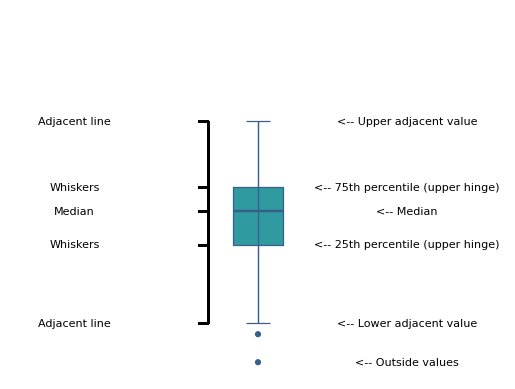

<ggplot: (690693629)>

In [ ]:
(
    ggplot(df2, aes(x="emp3bins", y="management"))
    + geom_boxplot(
        color=color[0], fill=color[4], size=0.5, width=0.1, alpha=0.5, na_rm=True
    )
    + stat_boxplot(geom="errorbar", width=0.05, color=color[0], size=0.5, na_rm=True)
    + scale_y_continuous(limits=(min, max))
    + annotate("text", x=1.3, y=ub, label="<-- Upper adjacent value", size=8)
    + annotate("text", x=1.3, y=q3, label="<-- 75th percentile (upper hinge)", size=8)
    + annotate("text", x=1.3, y=q2, label="<-- Median", size=8)
    + annotate("text", x=1.3, y=q1, label="<-- 25th percentile (upper hinge)", size=8)
    + annotate("text", x=1.3, y=lb, label="<-- Lower adjacent value", size=8)
    + annotate("text", x=1.3, y=out_lb, label="<-- Outside values", size=8)
    + annotate("text", x=0.63, y=ub, label="Adjacent line", size=8)
    + annotate("text", x=0.63, y=q3, label="Whiskers", size=8)
    + annotate("text", x=0.63, y=q2, label="Median", size=8)
    + annotate("text", x=0.63, y=q1, label="Whiskers", size=8)
    + annotate("text", x=0.63, y=lb, label="Adjacent line", size=8)
    + geom_segment(aes(x=0.9, y=lb, xend=0.9, yend=ub))
    + geom_segment(aes(x=0.88, y=lb, xend=0.9, yend=lb))
    + geom_segment(aes(x=0.88, y=q1, xend=0.9, yend=q1))
    + geom_segment(aes(x=0.88, y=q2, xend=0.9, yend=q2))
    + geom_segment(aes(x=0.88, y=q3, xend=0.9, yend=q3))
    + geom_segment(aes(x=0.88, y=ub, xend=0.9, yend=ub))
    + theme_bw()
    + theme(
        axis_title_x=element_blank(),
        axis_line_x=element_blank(),
        axis_ticks=element_blank(),
        axis_text_x=element_blank(),
        axis_title_y=element_blank(),
        axis_line_y=element_blank(),
        axis_text_y=element_blank(),
        panel_grid=element_blank(),
        panel_border=element_blank(),
    )
)

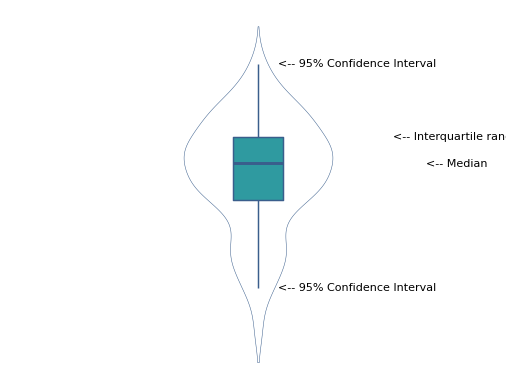

<ggplot: (690766171)>

In [ ]:
(
    ggplot(df2, aes(x="emp3bins", y="management"))
    + geom_violin(
        size=0.2,
        width=0.3,
        trim=False,
        show_legend=False,
        na_rm=True,
        color=color[0],
        alpha=0.3,
    )
    + geom_boxplot(
        color=color[0],
        fill=color[4],
        size=0.6,
        width=0.1,
        alpha=0.5,
        na_rm=True,
        outlier_color="",
    )
    + annotate("text", x=1.2, y=ub, label="<-- 95% Confidence Interval", size=8)
    + annotate("text", x=1.2, y=lb, label="<-- 95% Confidence Interval", size=8)
    + annotate("text", x=1.4, y=q3, label="<-- Interquartile range", size=8)
    + annotate("text", x=1.4, y=q2, label="<-- Median", size=8)
    + ylim(1, 4)
    + theme_bw()
    + theme(
        axis_title_x=element_blank(),
        axis_line_x=element_blank(),
        axis_ticks=element_blank(),
        axis_text_x=element_blank(),
        axis_title_y=element_blank(),
        axis_line_y=element_blank(),
        axis_text_y=element_blank(),
        panel_grid=element_blank(),
        panel_border=element_blank(),
    )
)